##1. Importing Necessary Libraries

In [ ]:
#for linking with google dive
from google.colab import drive

#to iterate the directory structure of dataset
import glob
import tensorflow as tf

#to handle datafames
import matplotlib.pyplot as plt

#to import input nii.gz data
import nibabel as nib

#to handle python arrays
import numpy as np
import cv2

import keras
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *



##2. linking with drive and loading input data file names
##(Dataset without Preprocessing)


In [ ]:
#monunting or linking with google drive
drive.mount('/content/gdrive')


#getting the names of files in the corresponding folders i.e., training images and training labels file names
train_images_names=glob.glob("/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_raw/Dataset101_HepVes/imagesTr/*.nii.gz")
train_labels_names=glob.glob("/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_raw/Dataset101_HepVes/labelsTr/*.nii.gz")

test_images_names=glob.glob("/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_raw/Dataset101_HepVes/imagesTs/*.nii.gz")
test_labels_names=glob.glob("/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_raw/Dataset101_HepVes/labelsTs/*.nii.gz")

#counting total number of images
print(len(train_images_names))
print(len(train_labels_names))

print(len(test_images_names))
print(len(test_labels_names))




Mounted at /content/gdrive
243
243
60
60


In [ ]:
preprocessed_train_images_labels=glob.glob("/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed/Dataset101_HepVes/nnUNetPlans_3d_lowres/*.npy")
preprocessed_test_images_labels=glob.glob("/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed_test/Dataset101_HepVes/nnUNetPlans_3d_lowres/*.npy")
preprocessed_train_images_seg_names=[]
preprocessed_train_images_names=[]
preprocessed_test_images_seg_names=[]
preprocessed_test_images_names=[]
for i in range(len(preprocessed_train_images_labels)):
  name=preprocessed_train_images_labels[i]
  if name.__contains__('seg'):
    preprocessed_train_images_seg_names.append(name)
  else:
    preprocessed_train_images_names.append(name)

for i in range(len(preprocessed_test_images_labels)):
  name=preprocessed_test_images_labels[i]
  if name.__contains__('seg'):
    preprocessed_test_images_seg_names.append(name)
  else:
    preprocessed_test_images_names.append(name)

print("train images length:", (len(preprocessed_train_images_names)))
print("train segmentations length:", (len(preprocessed_train_images_seg_names)))
print("test images length:", len(preprocessed_test_images_names))
print("test segmentations length:", len(preprocessed_test_images_seg_names))


# for filename in preprocessed_test_images_names:
#   npz_file=np.load(filename)
#   for img in npz_file:
#     if img=="data":
#       np.save(filename[:-4]+".npy", npz_file[img])
#     elif img=="seg":
#       np.save(filename[:-4]+"_seg.npy", npz_file[img])
#     pass

train images length: 243
train segmentations length: 243
test images length: 60
test segmentations length: 60


##3. Sorting File Names

In [ ]:
#converting list of files names to array and sorting them

train_images =  np.sort(np.array(train_images_names))
train_labels = np.sort(np.array(train_labels_names))

test_images =  np.sort(np.array(test_images_names))
test_labels = np.sort(np.array(test_labels_names))

# print(len(train_images))
# print(train_labels[0:5])

# print(len(test_images))
# print(test_labels[0:5])

preprocessed_train_images = np.sort(np.array(preprocessed_train_images_names))
preprocessed_train_labels = np.sort(np.array(preprocessed_train_images_seg_names))
preprocessed_test_images = np.sort(np.array(preprocessed_test_images_names))
preprocessed_test_labels = np.sort(np.array(preprocessed_test_images_seg_names))

print(len(preprocessed_train_images))
print(preprocessed_train_images[0:5])

print(len(preprocessed_train_labels))
print(preprocessed_train_labels[0:5])

print(len(preprocessed_test_images))
print(preprocessed_test_images[0:5])

print(len(preprocessed_test_labels))
print(preprocessed_test_labels[0:5])

243
['/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed/Dataset101_HepVes/nnUNetPlans_3d_lowres/hepaticvessel_001.npy'
 '/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed/Dataset101_HepVes/nnUNetPlans_3d_lowres/hepaticvessel_002.npy'
 '/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed/Dataset101_HepVes/nnUNetPlans_3d_lowres/hepaticvessel_004.npy'
 '/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed/Dataset101_HepVes/nnUNetPlans_3d_lowres/hepaticvessel_005.npy'
 '/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed/Dataset101_HepVes/nnUNetPlans_3d_lowres/hepaticvessel_007.npy']
243
['/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed/Dataset101_HepVes/nnUNetPlans_3d_lowres/hepaticvessel_001_seg.npy'
 '/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed/Dataset101_HepVes/nnUNetPlans_3d_lowres/hepaticvessel_00

##4. loading a random input image

/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_raw/Dataset101_HepVes/imagesTr/hepaticvessel_050_0000.nii.gz
/content/gdrive/My Drive/Colab Notebooks/nnUNet/nnunetv2/nnUNet_preprocessed/Dataset101_HepVes/nnUNetPlans_3d_lowres/hepaticvessel_050.npy
(512, 512, 41)
(1, 75, 318, 318)


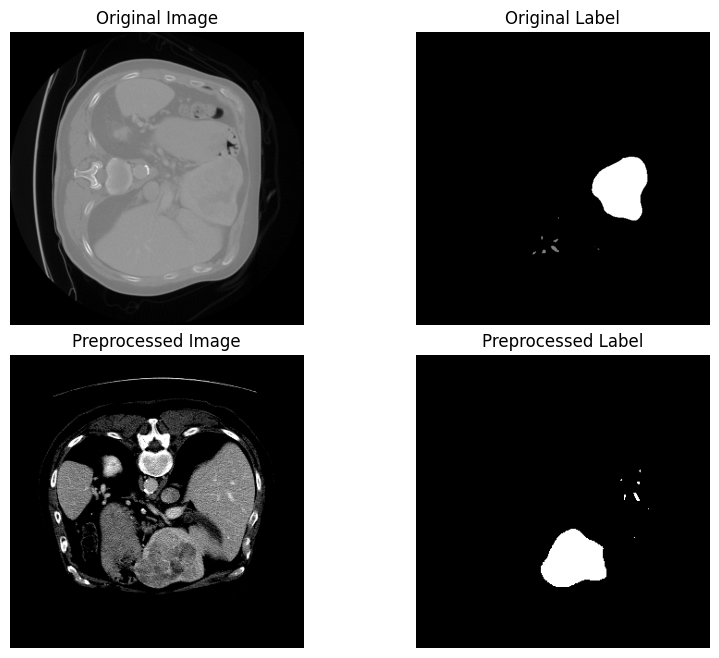

In [ ]:
def get_input(file_name1, file_name2, status):
  if status==0:
      nii_img  = nib.load(file_name1)
      nii_data = nii_img.get_fdata()
      nii_img  = nib.load(file_name2)
      nii_lbl_data = nii_img.get_fdata()
      nii_data[nii_data == 2]=1
      return nii_data, nii_lbl_data
  elif status==1:
      np_img  = np.load(file_name1)
      np_lbl  = np.load(file_name2)
      np_lbl[np_lbl == 2]=1
      return np_img, np_lbl
print(np.sort(np.array(train_images_names))[30])
print(preprocessed_train_images[30])
img1, lbl1 = get_input(np.sort(np.array(train_images_names))[30], np.sort(np.array(train_labels_names))[30],0)
p_img1, p_lbl1 = get_input(preprocessed_train_images[30], preprocessed_train_labels[30],  1)
print(img1.shape)
print(p_img1.shape)
max_rows = 2
max_cols = 2
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(10,8))
axes[0, 0].axis("off")
axes[0, 0].set_title("Original Image")
axes[0 ,0].imshow(img1[:,:, 20], cmap="gray")
axes[0, 1].axis("off")
axes[0, 1].set_title("Original Label")
axes[0 ,1].imshow(lbl1[:,:, 20], cmap="gray")
axes[1, 0].axis("off")
axes[1, 0].set_title("Preprocessed Image")
axes[1 ,0].imshow(p_img1[0, 35, :,:], cmap="gray")
axes[1, 1].axis("off")
axes[1, 1].set_title("Preprocessed Label")
axes[1 ,1].imshow(p_lbl1[0, 35, :,:], cmap="gray")
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()


##Evaluating Min and Max Pixel Value for Normalization

In [ ]:
def find_global_min_max():
  global_min=0
  global_max=0
  for i in range(1,len(train_images)):
    nii_img  = nib.load(train_images[i])
    nii_data = nii_img.get_fdata()
    if np.min(nii_data)<global_min:
      global_min=np.min(nii_data)
    if np.max(nii_data)>global_max:
      global_max=np.max(nii_data)
  return global_min, global_max
global_min, global_max=find_global_min_max()


##5. Slices Array

In [ ]:
#making a list of list of unique slices in dataset to iterate them indvidually

def make_index_Array(img_names):
  index_array=[]
  for i in range(len(img_names)):
    nii_img  = nib.load(img_names[i])
    nii_data = nii_img.get_fdata()
    for j in range(nii_data.shape[2]):
      index_array.append([i, j])
  return index_array

def make_preprocessed_index_Array(img_names):
  index_array=[]
  for i in range(len(img_names)):
    np_img  = np.load(img_names[i])
    for j in range(np_img.shape[1]):
      index_array.append([i, j])
  return index_array
# train_index_ary=make_index_Array(train_images[1:])
# test_index_ary=make_index_Array(test_images)

preprocessed_train_index_ary=make_preprocessed_index_Array(preprocessed_train_images)
preprocessed_test_index_ary=make_preprocessed_index_Array(preprocessed_test_images)


print(preprocessed_train_index_ary)
print(preprocessed_test_index_ary)

# print(test_index_ary)
# print(len(test_index_ary))


[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], [0, 25], [0, 26], [0, 27], [0, 28], [0, 29], [0, 30], [0, 31], [0, 32], [0, 33], [0, 34], [0, 35], [0, 36], [0, 37], [0, 38], [0, 39], [0, 40], [0, 41], [0, 42], [0, 43], [0, 44], [0, 45], [0, 46], [0, 47], [0, 48], [0, 49], [0, 50], [0, 51], [0, 52], [0, 53], [0, 54], [0, 55], [0, 56], [0, 57], [0, 58], [0, 59], [0, 60], [0, 61], [0, 62], [0, 63], [0, 64], [0, 65], [0, 66], [0, 67], [0, 68], [0, 69], [0, 70], [0, 71], [0, 72], [0, 73], [0, 74], [0, 75], [0, 76], [0, 77], [0, 78], [0, 79], [0, 80], [0, 81], [0, 82], [0, 83], [0, 84], [0, 85], [0, 86], [0, 87], [0, 88], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1

In [ ]:

# print("train slices", len(train_index_ary))
# print("test slices", len(test_index_ary))

print("Total train slices", len(preprocessed_train_index_ary))
print("Total test slices", len(preprocessed_test_index_ary))

Total train slices 20040
Total test slices 5756


##Loading Image and Corresponding Label

In [ ]:
def load_image(image_names, label_names, index, status):
  if status==0:
    img_name=image_names[index]
    lbl_name=label_names[index]
    nii_img  = nib.load(img_name)
    nii_img_data = nii_img.get_fdata()
    nii_img_data=(nii_img_data-global_min)/(global_max-global_min)
    nii_lbl  = nib.load(lbl_name)
    nii_lbl_data = nii_lbl.get_fdata()
    img=nii_img_data
    lbl=nii_lbl_data
  elif status==1:
    img_name=image_names[index]
    lbl_name=label_names[index]
    np_img  = np.load(img_name)
    np_lbl  = np.load(lbl_name)
    img=np_img
    lbl=np_lbl
  # print("loaded image shape:        ", img.shape, lbl.shape)
  return img, lbl

#Resize Images

In [ ]:
def resize_img(img, lbl, prep):
  resized_imgs=[]
  resized_lbls=[]
  if prep==1:
    chan=img.shape[1]

  else:
    chan=img.shape[2]
  for i in range(chan):
    if prep==1:
      re_img=cv2.resize(img[0,i,:,:],(256,256), interpolation=cv2.INTER_LINEAR)
      lbl[lbl < 0]=0
      array = np.array(lbl[0,i,:,:], dtype='uint8')
      re_lbl=cv2.resize(array,(256,256), interpolation=cv2.INTER_LINEAR)
    else:
      re_img=cv2.resize(img[:,:,i],(256,256), interpolation=cv2.INTER_LINEAR)
      re_lbl=cv2.resize(lbl[:,:,i],(256,256), interpolation=cv2.INTER_LINEAR)
    re_lbl[re_lbl > 0]=1
    resized_imgs.append(re_img)
    resized_lbls.append(re_lbl)
  resized_imgs=np.array(resized_imgs)
  resized_lbls=np.array(resized_lbls)
  resized_imgs=np.moveaxis(resized_imgs, 0,2)
  resized_lbls=np.moveaxis(resized_lbls, 0, 2)
  return resized_imgs, resized_lbls

rand_img=np.load(preprocessed_test_images[0])
rand_lbl=np.load(preprocessed_test_labels[0])
print(rand_img.shape, rand_lbl.shape)
print(np.unique(rand_lbl))
print(rand_img.shape, rand_lbl.shape)
img, lbl=resize_img(rand_img, rand_lbl, 1)
print(img.shape, lbl.shape)
print(np.unique(lbl))



(1, 89, 313, 313) (1, 89, 313, 313)
[-1  0  1  2]
(1, 89, 313, 313) (1, 89, 313, 313)
(256, 256, 89) (256, 256, 89)
[0 1]


###Load Batch of Slices

In [ ]:
#load indvidual slices from each input image, which are passed by image data generator
def get_slice(index_array_elem, image_names, label_names, loaded_img_p, loaded_lbl_p, img_index_p, status):
  slices_index = np.array(index_array_elem)[:,1]
  image_index = np.array(index_array_elem)[:,0]
  unique_image_indexes=np.unique(image_index)
  # print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&", len(unique_image_indexes))
  # print("***********************************",unique_image_indexes)
  if len(loaded_img_p)==0:
    if len(unique_image_indexes)==1:
      # print("**********************************1st time image is null")
      nii_img_data1, nii_lbl_data1=load_image(image_names, label_names, unique_image_indexes[0], status)
      nii_img_data1, nii_lbl_data1 = resize_img(nii_img_data1, nii_lbl_data1, status)
      current_index= unique_image_indexes[0]
      loaded_img_p = nii_img_data1
      loaded_lbl_p = nii_lbl_data1
    elif len(unique_image_indexes)==2:
      # print("*********************************unique indexes = 2")
      nii_img_data1, nii_lbl_data1=load_image(image_names, label_names, unique_image_indexes[0], status)
      nii_img_data1, nii_lbl_data1 = resize_img(nii_img_data1, nii_lbl_data1, status)
      nii_img_data2, nii_lbl_data2=load_image(image_names, label_names, unique_image_indexes[1], status)
      nii_img_data2, nii_lbl_data2 = resize_img(nii_img_data2, nii_lbl_data2, status)
      loaded_img_p = nii_img_data2
      loaded_lbl_p = nii_lbl_data2
      current_index=unique_image_indexes[1]
      # print("both images loaded")
  else:
    if len(unique_image_indexes)==1 and unique_image_indexes[0]==img_index_p:
      # print("*****************************************unique indexes = 1, match previous=True")
      nii_img_data1=loaded_img_p
      nii_lbl_data1=loaded_lbl_p
      current_index=img_index_p
    elif len(unique_image_indexes)==1 and unique_image_indexes[0]!=img_index_p:
      # print("**************************unique indexes = 1, match previous=False")
      nii_img_data1, nii_lbl_data1=load_image(image_names, label_names, unique_image_indexes[0], status)
      nii_img_data1, nii_lbl_data1 = resize_img(nii_img_data1, nii_lbl_data1, status)
      current_index=unique_image_indexes[0]
      loaded_img_p = nii_img_data1
      loaded_lbl_p = nii_lbl_data1
    elif len(unique_image_indexes)==2:
      # print("****************************unique indexes = 2")
      nii_img_data1, nii_lbl_data1=load_image(image_names, label_names, unique_image_indexes[0], status)
      nii_img_data1, nii_lbl_data1 = resize_img(nii_img_data1, nii_lbl_data1, status)
      nii_img_data2, nii_lbl_data2=load_image(image_names, label_names, unique_image_indexes[1], status)
      nii_img_data2, nii_lbl_data2 = resize_img(nii_img_data2, nii_lbl_data2, status)
      loaded_img_p = nii_img_data2
      loaded_lbl_p = nii_lbl_data2
      current_index=unique_image_indexes[1]
      # print("**************************************both images loaded")
  if len(unique_image_indexes)==1:
    # print(np.min(np.array(index_array_elem)[:,1]), np.max(np.array(index_array_elem)[:,1]))
    # print(slices_index)
    input_img_slices= nii_img_data1[:,:,np.min(np.array(slices_index)):np.max(np.array(slices_index))+1]
    input_lbl_slices= nii_lbl_data1[:,:,np.min(np.array(slices_index)):np.max(np.array(slices_index))+1]
    # print("batches have been loaded for 1 image")
  elif len(unique_image_indexes)==2:
    # print("going to load slices from 2 images")
    slices_img=[]
    slices_lbl=[]
    for i in range(len(index_array_elem)):
      # print("loop will run time", len(index_array_elem))
      # print("***************************", unique_image_indexes, slices_index)
      if image_index[i]==unique_image_indexes[0]:
        slices_img.append(nii_img_data1[:,:,slices_index[i]])
        slices_lbl.append(nii_lbl_data1[:,:,slices_index[i]])
      elif image_index[i]==unique_image_indexes[1]:
        slices_img.append(nii_img_data2[:,:,slices_index[i]])
        slices_lbl.append(nii_lbl_data2[:,:,slices_index[i]])
    # print("batches loaded for both images")
    slices_img2=np.array(slices_img)
    slices_lbl2=np.array(slices_lbl)
    # print("before reshape")
    # print("************************",slices_img2.shape, slices_lbl2.shape)
    input_img_slices=np.moveaxis(slices_img2, 0,2)
    input_lbl_slices= np.moveaxis(slices_lbl2, 0, 2)
    # print("*****************************", input_img_slices.shape, input_lbl_slices.shape)
  return input_img_slices , input_lbl_slices, loaded_img_p, loaded_lbl_p, current_index

###Image Data Generator

In [ ]:
#Load the image slices batch by batch on the basis of specified batach size

def data_generator(indexes, batch_size, image_names, label_names, status):
    n = int(np.ceil(len(indexes) / batch_size))
    chk = 0
    i = 0

    loaded_image=[]
    loaded_label=[]
    current_index=0
    while True:
        data_batch = []
        output_batch = []
        a = i * batch_size
        b = (i + 1) * batch_size
        index_elements=indexes[a:b]
        # print(index_elements)
        inp_img, mask_img, loaded_image, loaded_label, current_index = get_slice(index_elements, image_names, label_names, loaded_image, loaded_label, current_index, status)

        # for j in range(len(index_elements)):
        #     inp_img, mask_img, loaded_image, loaded_label, current_index = get_slice(index_elements, train_images[1:], train_labels[1:], loaded_image, loaded_label, current_index)
            # if np.max(inp_img) > 1:
            #     inp_img = inp_img / (np.max(inp_img))
            # if np.max(mask_img) > 1:
            #     mask_img = mask_img / (np.max(mask_img))
            # data_batch.append(inp_img)
            # output_batch.append(mask_img)

        b1 = np.array(inp_img)
        b2 = np.array(mask_img)
        # print(b1.shape, b2.shape)
        new_shape=(batch_size, b1.shape[0], b1.shape[1], 1)
        b1=np.moveaxis(b1, 2,0)
        b1=np.expand_dims(b1, axis=3)
        b2=np.moveaxis(b2, 2,0)
        b2=np.expand_dims(b2, axis=3)
        yield b1, b2
        i = i+1
        if i == n - 1:
            i = 0



#Function to Train model

In [ ]:

def train_model(model, weights_file, epochs, status):
  checkpoint = ModelCheckpoint(weights_file,
                                 monitor='dice_loss',
                                 verbose=1,
                                 save_best_only=True)
  early = EarlyStopping(monitor='loss', min_delta=0, patience=25,  verbose=1, mode='auto')
  rlrop = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, min_lr=0.000001)
  # history = model.fit(data_generator(train_index_ary, 10, train_images[1:], train_labels[1:]), steps_per_epoch=5256/10, epochs=epochs, callbacks=[early, checkpoint, rlrop],
  #                     validation_data=data_generator(test_index_ary, 10, test_images, test_labels),validation_steps=5256/10, verbose=1)

  history = model.fit(data_generator(preprocessed_train_index_ary, 25, preprocessed_train_images, preprocessed_train_labels, status), steps_per_epoch=20040/25, epochs=epochs, callbacks=[early, checkpoint, rlrop],
                      verbose=1)

  return model, history
#20040/5
#5756/5

In [ ]:
def plot_history(history):
  plt.plot(history.history['dice_loss'])
  plt.plot(history.history['val_dice_loss'])
  plt.plot(history.history['dice_coeff'])
  plt.plot(history.history['val_dice_coeff'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['dice_loss', 'val_dice_loss', "dice_coeff", "val_dice_coeff"], loc='upper left')
  plt.show()

def plot_history2(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['training_loss', 'validation_loss', "training accuracy", "validation accuracy"], loc='upper left')
  plt.show()

##Function to display model's predictions

In [ ]:
from google.colab.patches import cv2_imshow
from skimage.filters import threshold_otsu, threshold_triangle, threshold_yen

def display_predictions_valid_data( model, test_index_ary, test_images, test_labels, status):
  print("function")
  val_gen=data_generator(test_index_ary, 10, test_images, test_labels, status)
  print("val data loaded")
  j=0
  total_score=0
  count=0
  # for imgs, lbls in val_gen:
  # for i in range(1, len(test_images)):
  for i in range(7, 20):
    if i not in [11, 12, 13, 17, 19]:
      img, lbl=load_image(test_images, test_labels, i, status)
      img, lbl=resize_img(img, lbl, 1)
      img=np.moveaxis(img, 2,0)
      lbl=np.moveaxis(lbl, 2,0)
      img=np.expand_dims(img, axis=3)
      lbl=np.expand_dims(lbl, axis=3)
      print("entered in valgen loop")
      val_pred = model.predict(img)
      max_rows = 3
      max_cols = 4
      fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(15,12))
      for idx in range(max_cols):

        axes[0, idx].axis("off")
        axes[0, idx].set_title('Test Image'+str(i)+" slice no: "+str(idx+1))
        axes[0 ,idx].imshow(img[27+idx], cmap="gray")
      for idx in range(max_cols):
        pred_Array=np.sort(np.unique(np.array(val_pred[25+idx]).flatten()))
        len_pred=int(len(pred_Array)*499/500)
        prediction=val_pred[27+idx]
        prediction2=prediction.copy()

        otsu_threshold = threshold_otsu(prediction)
        otsu_thresholded_image = prediction >= otsu_threshold
        score=dice_coeff(otsu_thresholded_image, lbl[27+idx])
        # print(np.array(score))

        prediction2[prediction2<pred_Array[len_pred]]=0
        prediction2[prediction2>=pred_Array[len_pred]]=1
        otsu_threshold2 = threshold_otsu(prediction2)
        otsu_thresholded_image2 = prediction2 >= otsu_threshold2
        score2=dice_coeff(otsu_thresholded_image2, lbl[25+idx])

        if score2>score:
          otsu_thresholded_image=otsu_thresholded_image2
          score=score2
        axes[1, idx].axis("off")
        axes[1, idx].set_title('Test Prediction'+str(i)+" score: "+str(np.round(np.array(score)*100,2)))
        axes[1, idx].imshow( otsu_thresholded_image, cmap="gray")

      for idx in range(max_cols):
        axes[2, idx].axis("off")
        axes[2, idx].set_title('Train Label'+str(i)+" slice no: "+str(idx+1))
        axes[2, idx].imshow(lbl[27+idx], cmap="gray")
      if score>0.59:
        total_score=total_score+score
        count+=1
      plt.subplots_adjust(wspace=.1, hspace=.1)
      plt.show()
  print("total dice: ", np.array(total_score/count)*100)

  #   for i in range (val_pred.shape[0]):
  #     print("prediction==================================", i)

  #     pred_Array=np.sort(np.unique(np.array(val_pred[i]).flatten()))
  #     # print(len(pred_Array))
  #     len_pred=int(len(pred_Array)*999/1000)
  #     # print(len_pred)
  #     prediction=val_pred[i]
  #     prediction[prediction<pred_Array[len_pred]]=0
  #     # prediction[prediction>=pred_Array[len_pred]]=1
  #     # print(np.unique(val_pred[i]))
  #     otsu_threshold = threshold_otsu(prediction)
  #     otsu_thresholded_image = prediction >= otsu_threshold
  #     plt.imshow(otsu_thresholded_image,cmap='gray', interpolation=None)
  #     plt.show()
  #     print("label==================================", i)
  #     plt.imshow(val_pred[i],cmap='gray', interpolation=None)
  #     plt.show()
  #     print("IMG==================================", i)
  #     plt.imshow(imgs[i],cmap='gray', interpolation=None)
  #     plt.show()
  #   if j==np.floor(10):
  #     break
  #   j=j+1
  # pass

##Function to decide training mode

In [ ]:
def train(model,  drive_path, save_path, status, ep,test_index_ary, test_images, test_labels, status_prep):
  if (os.path.isfile(drive_path) and status==2):
    model.load_weights(drive_path)
    # print("weights are loaded")
  else:
    # print("reached")
    if status==0:
      print("weights loaded training start")
      model.load_weights(drive_path)
      trained_model, history = train_model(model, save_path, ep, status_prep)
    elif status==1:
      trained_model, history = train_model(model, save_path, ep, status_prep)
    # model.load_weights(temp_path)
    # model.save(drive_path)
    plot_history(history)
  # display_predictions_valid_data(model)
  # score=Calculate_Dice_valid_data(model)
  # print("=====================")
  # print(score)
  display_predictions_valid_data( model, test_index_ary, test_images, test_labels, status_prep)


##Dice Coefficient Calculation

In [ ]:
from tensorflow.keras import backend as K
def dice_coeff(y_true, y_pred):
  smooth = 1.
  # Flatten
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  y_pred_f = tf.cast(y_pred_f, tf.float32)
  y_true_f = tf.cast(y_true_f, tf.float32)
  intersection = K.sum(y_true_f * y_pred_f)
  score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
  return score

def customized_loss(y_true, y_pred):
  return tf.math.log(tf.math.cosh(1-dice_coeff(y_true,y_pred)))

##Dice Loss Calculation

In [ ]:
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

##Calculate Dice Validation data

In [ ]:
def Calculate_Dice_valid_data( model, test_index_ary, test_images, test_labels):
  val_gen=data_generator(test_index_ary, 100, test_images, test_labels)
  # print("val data loaded")
  tot_score=0
  j=0
  for imgs, lbls in val_gen:
    # print("entered in valgen loop")
    # print(imgs.shape, lbls.shape)
    # print(np.unique(imgs))
    val_pred = model.predict(imgs)
    # print("batch no", j)
    # print(np.unique(val_pred))
    # val_pred[val_pred<0.07]=0
    val_pred[val_pred>=0]=1
    score=dice_coeff(lbls, val_pred)
    tot_score=tot_score+score
    print(tot_score)
    # for i in range (val_pred.shape[0]):
    #   pred=val_pred[i]
    #   lbl=lbls[i]
    #   score=dice_coeff(lbl, pred)
    #   tot_score=tot_score+score
    if (j==np.floor(5256/100)):
      return tot_score/j+1
      break
    j=j+1

##Unet

In [ ]:
def model(input_size=(512, 512,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(512, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same')(
         UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(
         UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(
         UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(
         UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    # conv9 = Conv2D(2, 3, activation='relu', padding='same')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy', dice_coeff, dice_loss])
    # print(model.summary())
    return model
model()

##New Defined Model 1

In [ ]:
def sk_unet(pretrained_weights=None, input_size=(256, 256, 1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(512, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same')(
         UpSampling2D(size=(2, 2))(drop5))
    up6_2 = Conv2D(512, 2, activation='relu', padding='same')(
        UpSampling2D(size=(2, 2))(pool4))
    merge6 = concatenate([up6_2, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(
         UpSampling2D(size=(2, 2))(conv6))
    up7_2 = Conv2D(256, 2, activation='relu', padding='same')(
        UpSampling2D(size=(2, 2))(pool3))
    merge7 = concatenate([up7_2, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(
         UpSampling2D(size=(2, 2))(conv7))
    up8_2 = Conv2D(128, 2, activation='relu', padding='same')(
        UpSampling2D(size=(2, 2))(pool2))
    merge8 = concatenate([up8_2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(
         UpSampling2D(size=(2, 2))(conv8))
    up9_2 = Conv2D(64, 2, activation='relu', padding='same')(
        UpSampling2D(size=(2, 2))(pool1))
    merge9 = concatenate([up9_2, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy',dice_coeff, dice_loss])
    return model

#Small Model

In [ ]:
def modelsmall(input_size=(512, 512,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(
         UpSampling2D(size=(2, 2))(pool1))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    # conv9 = Conv2D(2, 3, activation='relu', padding='same')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=[ dice_coeff])
    print(model.summary())
    return model
modelsmall()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 512, 512, 64)         640       ['input_2[0][0]']             
                                                                                                  
 conv2d_24 (Conv2D)          (None, 512, 512, 64)         36928     ['conv2d_23[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 256, 256, 64)         0         ['conv2d_24[0][0]']           
 g2D)                                                                                       

##New Defined Model 2

In [ ]:
def m6_unet(input_size=(256, 256, 1)):
    #upsampling concatenation could also be tried
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1_1 = MaxPooling2D(pool_size=(2, 2))(pool1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2_2 = MaxPooling2D(pool_size=(2, 2))(pool2)
    merge2 = concatenate([pool1_1, pool2], axis=3)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(merge2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3_3 = MaxPooling2D(pool_size=(2, 2))(pool3)
    merge3 = concatenate([pool2_2, pool3], axis=3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(merge3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    merge3 = concatenate([pool3_3, pool4], axis=3)

    conv5 = Conv2D(512, 3, activation='relu', padding='same')(merge3)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    merge6 = concatenate([drop5, pool4], axis=3)
    up6 = Conv2D(64, 2, activation='relu', padding='same')(
        UpSampling2D(size=(2, 2))(merge6))
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    merge7 = concatenate([conv6, pool3], axis=3)
    up7 = Conv2D(64, 2, activation='relu', padding='same')(
        UpSampling2D(size=(2, 2))(merge7))
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    merge8 = concatenate([conv7, pool2], axis=3)
    up8 = Conv2D(64, 2, activation='relu', padding='same')(
        UpSampling2D(size=(2, 2))(merge8))
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    merge9 = concatenate([conv8, pool1], axis=3)
    up9 = Conv2D(64, 2, activation='relu', padding='same')(
        UpSampling2D(size=(2, 2))(merge9))
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=3200,
    decay_rate=0.9)
    sgd=SGD(learning_rate=0.01, weight_decay=1e-6, momentum=0.3, nesterov=False)
    model.compile(sgd, loss='binary_crossentropy', metrics=[dice_loss, dice_coeff])
    return model

In [ ]:
def bce_dice_loss(y_true, y_pred):
    loss = keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [ ]:

def conv_block(inputs, filters, kernel_size=(3, 3), activation='relu', padding='same'):
    conv = Conv2D(filters, kernel_size, activation=activation, padding=padding)(inputs)
    conv = BatchNormalization()(conv)
    conv = Conv2D(filters, kernel_size, activation=activation, padding=padding)(conv)
    conv = BatchNormalization()(conv)
    return conv

def attention_gate(up_conv, down_conv):
    attention = tf.keras.layers.Conv2D(down_conv.shape[-1], (1, 1), activation='sigmoid')(up_conv)
    return tf.multiply(attention, down_conv)

def attention_unet(input_shape, num_classes):
    inputs = Input(input_shape)

    # Encoder
    conv1 = conv_block(inputs, 64)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = conv_block(pool1, 128)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = conv_block(pool2, 256)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = conv_block(pool3, 512)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = conv_block(pool4, 1024)

    # Decoder
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = attention_gate(up6, conv4)
    concat6 = Concatenate(axis=3)([up6, conv4])
    conv6 = conv_block(concat6, 512)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = attention_gate(up7, conv3)
    concat7 = Concatenate(axis=3)([up7, conv3])
    conv7 = conv_block(concat7, 256)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = attention_gate(up8, conv2)
    concat8 = Concatenate(axis=3)([up8, conv2])
    conv8 = conv_block(concat8, 128)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = attention_gate(up9, conv1)
    concat9 = Concatenate(axis=3)([up9, conv1])
    conv9 = conv_block(concat9, 64)

    outputs = Conv2D(num_classes, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', dice_coeff, dice_loss])
    return model


#Calling Functions Over here

function
val data loaded
entered in valgen loop
3/3 [==============================] - 1s 527ms/step


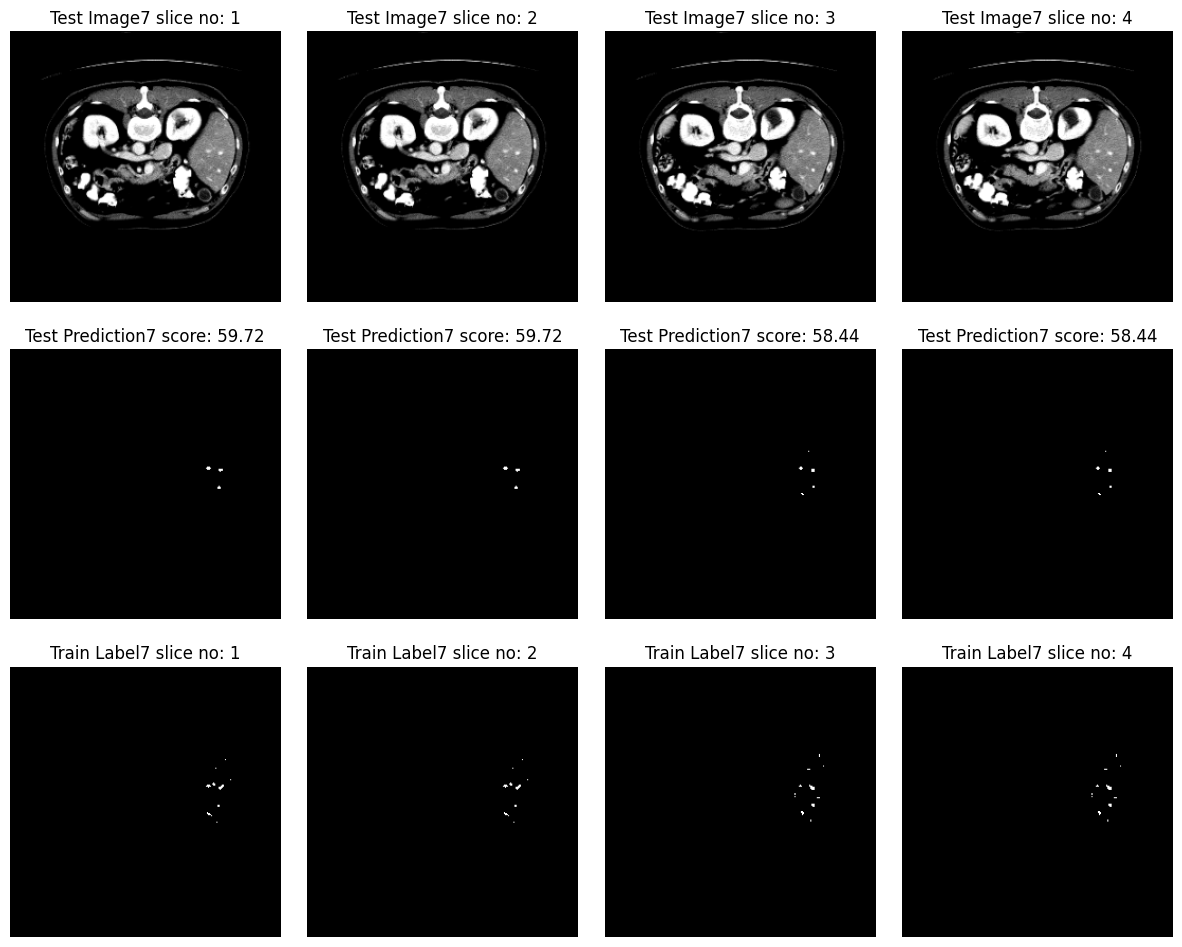

entered in valgen loop
3/3 [==============================] - 1s 523ms/step


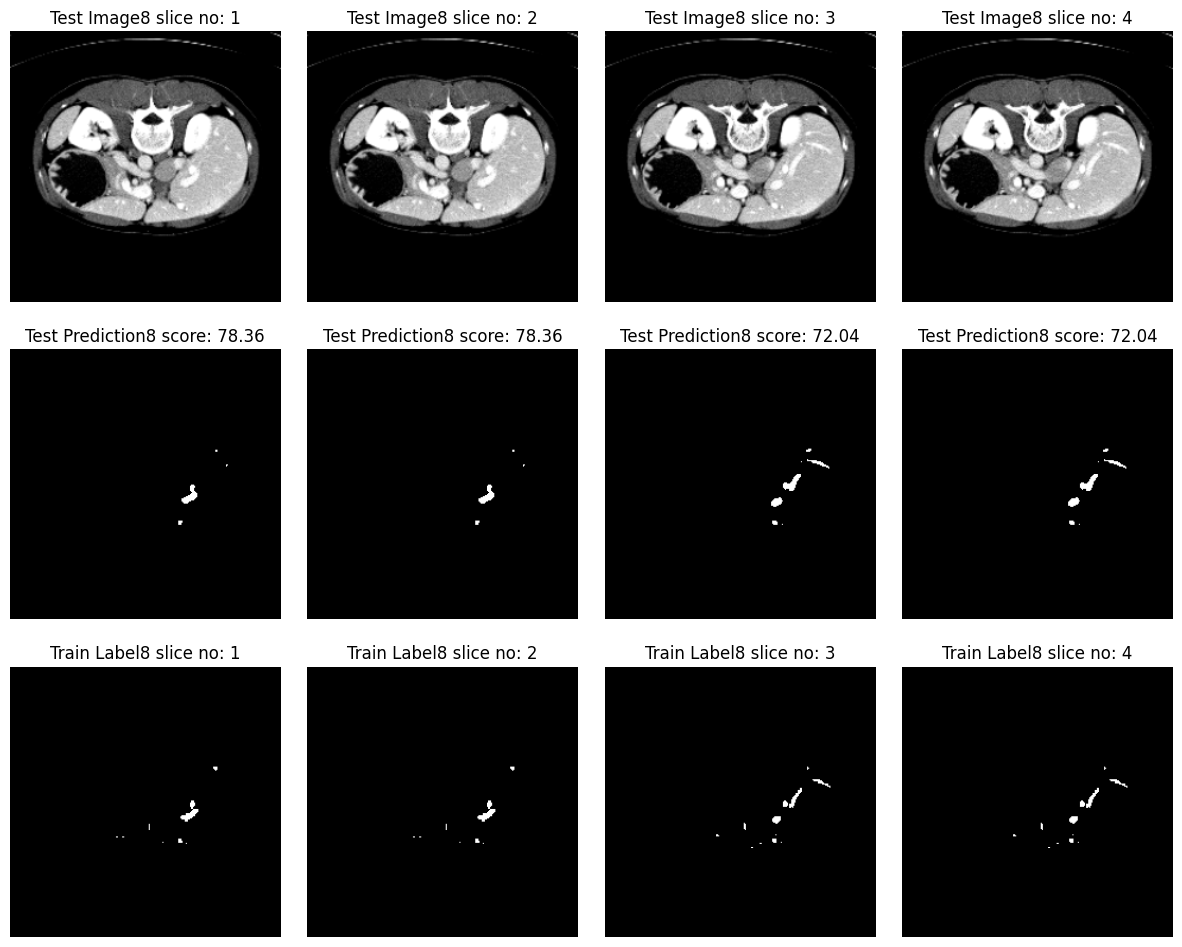

entered in valgen loop
3/3 [==============================] - 1s 524ms/step


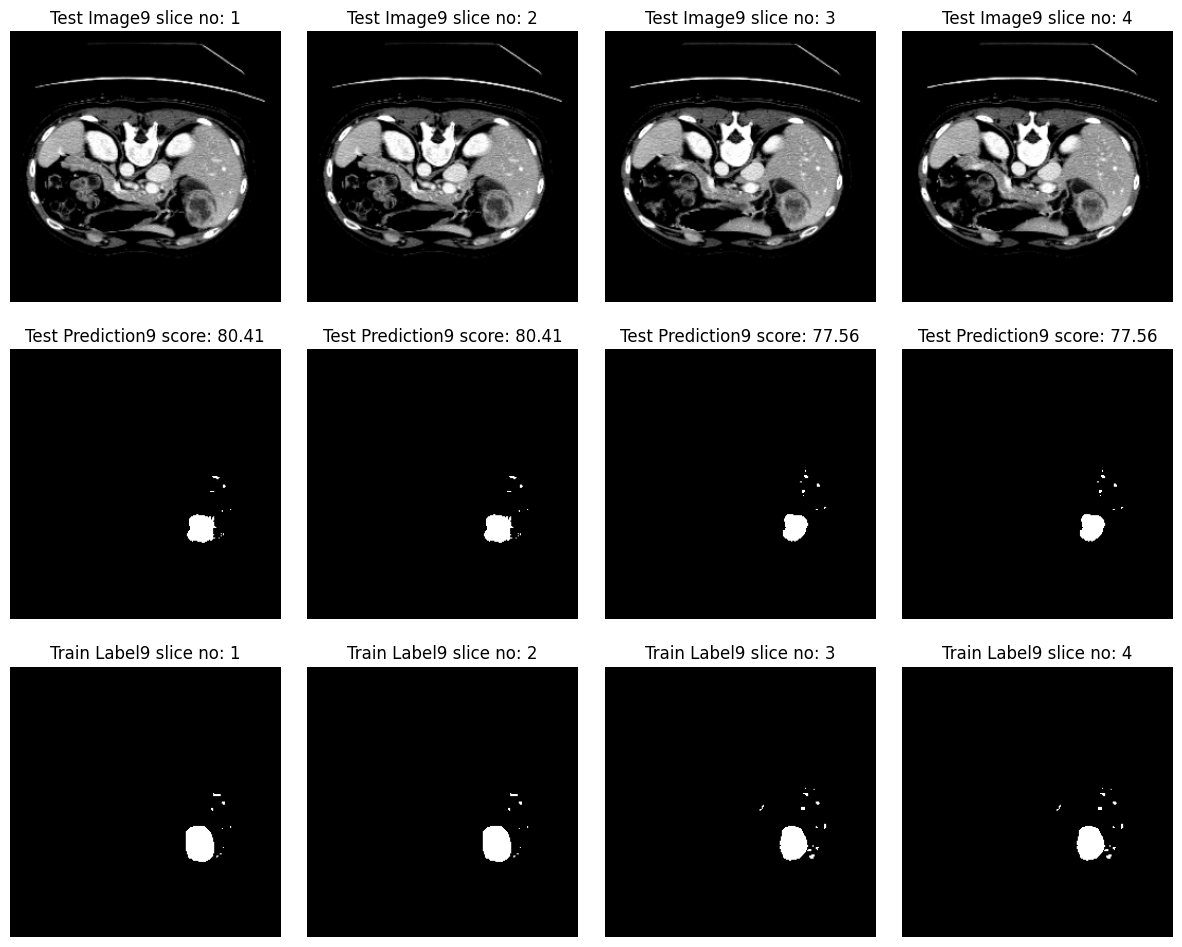

entered in valgen loop
3/3 [==============================] - 1s 534ms/step


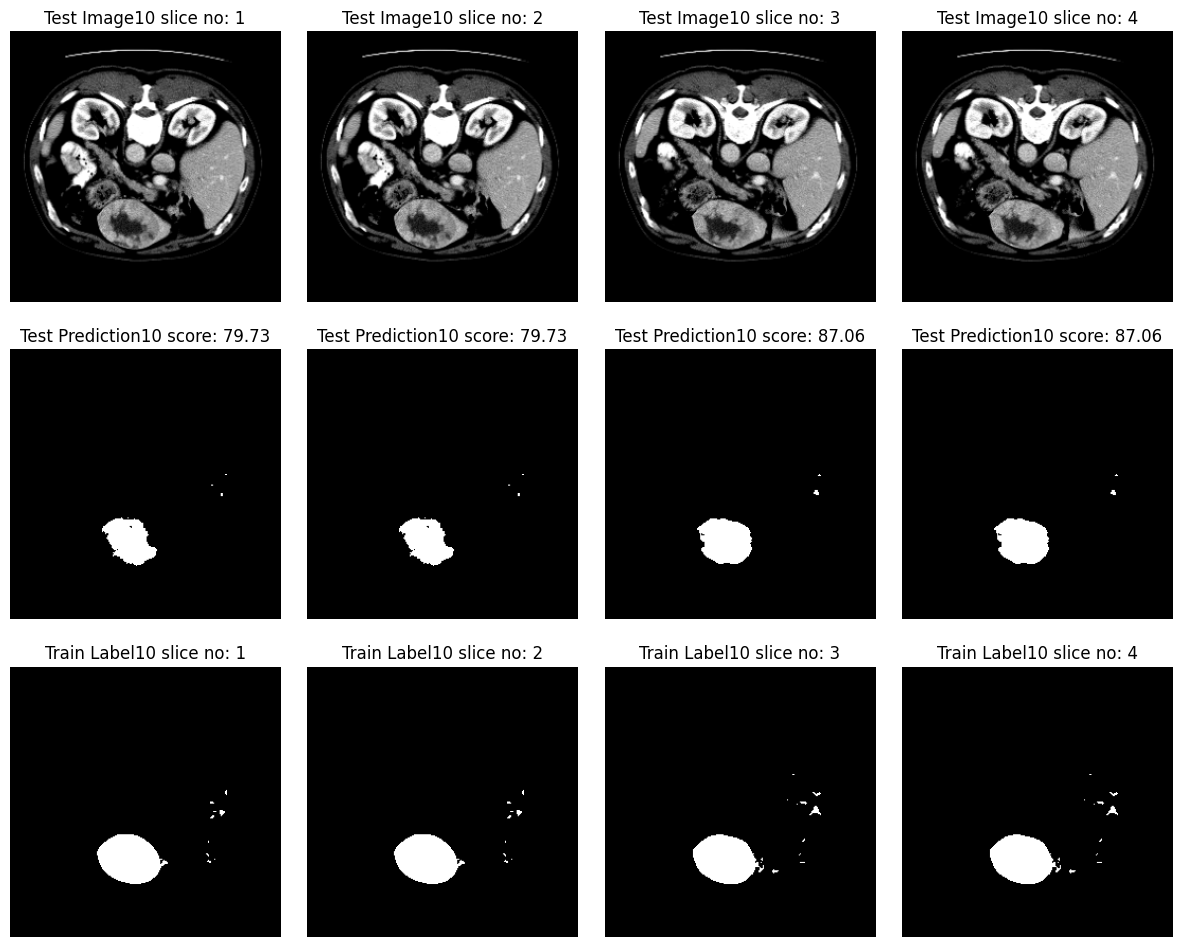

entered in valgen loop
4/4 [==============================] - 2s 525ms/step


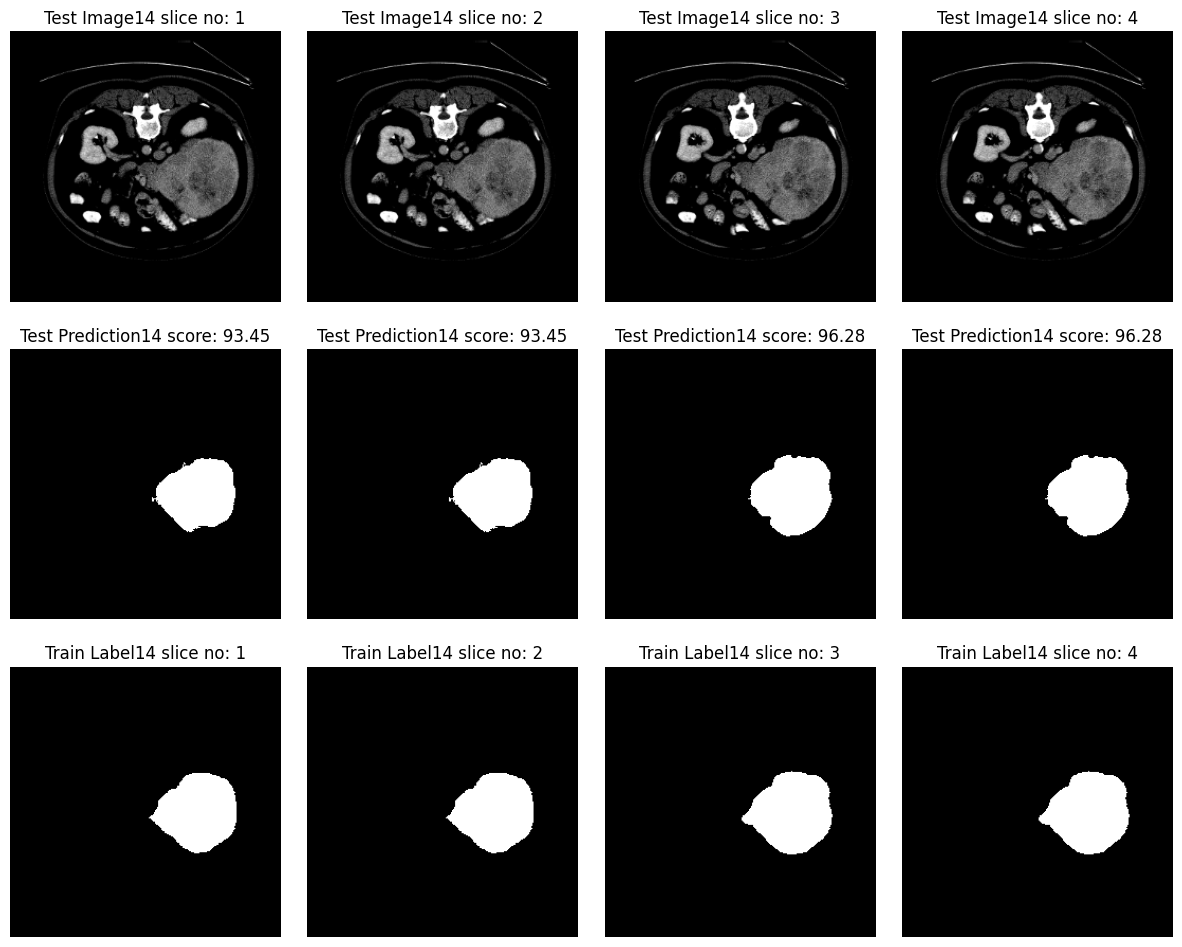

entered in valgen loop
4/4 [==============================] - 2s 543ms/step


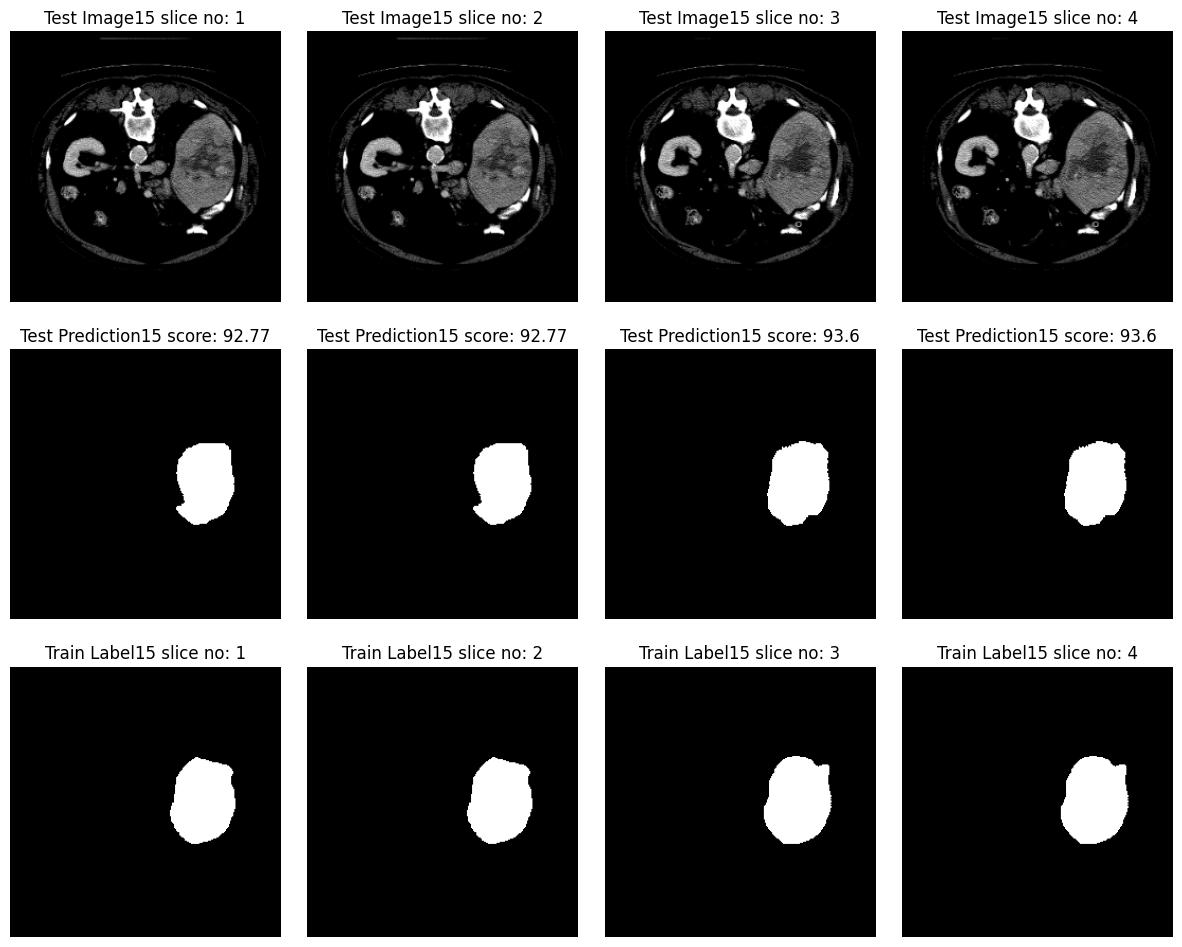

entered in valgen loop
3/3 [==============================] - 1s 548ms/step


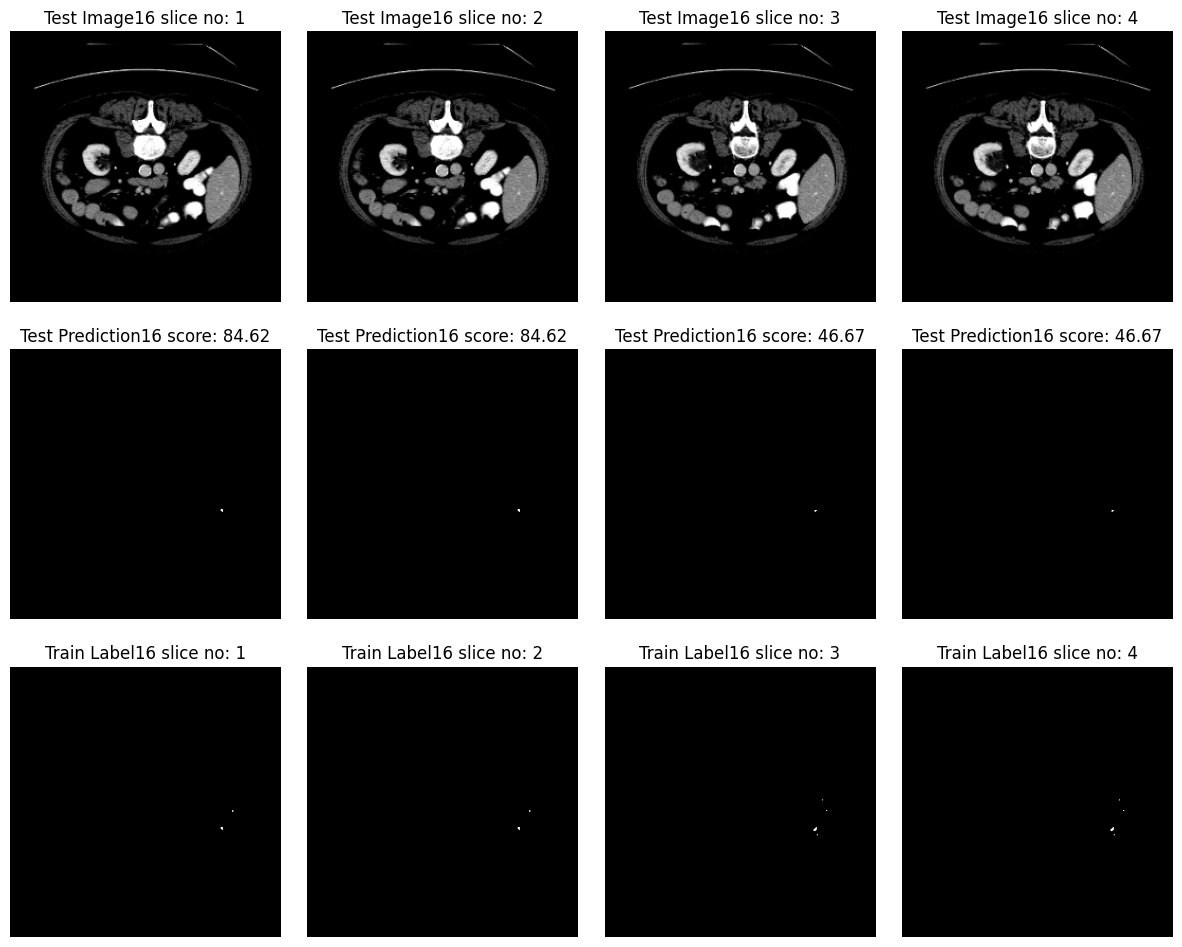

entered in valgen loop
3/3 [==============================] - 1s 541ms/step


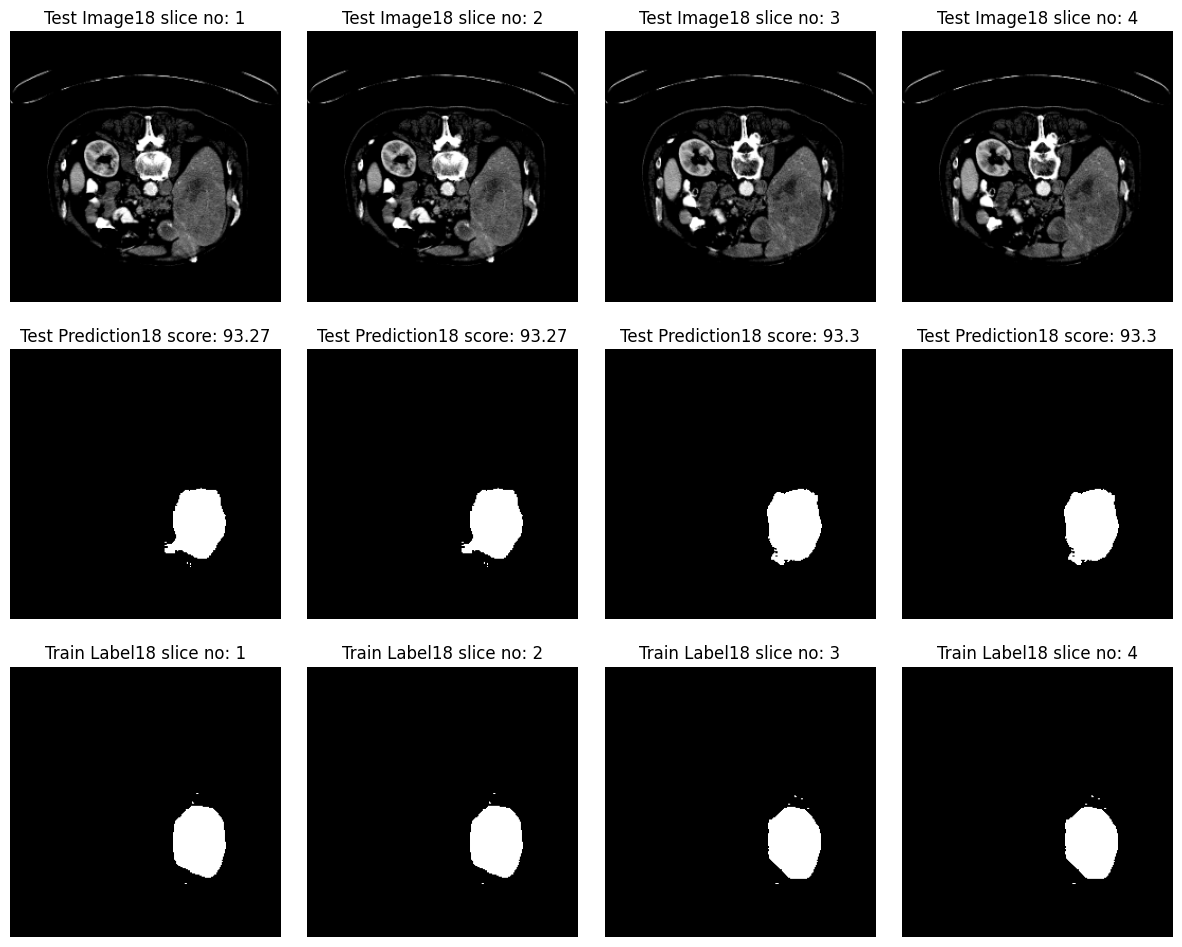

total dice:  86.63802742958069
26.0802800655365


In [ ]:
from time import time
def main():
  load_weights_and_train=0
  only_train=1
  load_Weights_And_display_predictions=2
  start = time()
#   models = model((256, 256,1))
  input_shape = (256, 256, 1)
  num_classes = 1
  models = attention_unet(input_shape, num_classes)



  train(models,  '/content/gdrive/My Drive/vessels_results_self/preprocessed_attention_net4.h5', '/content/gdrive/My Drive/vessels_results_self/preprocessed_attention_net4.h5', 2, 50, preprocessed_train_index_ary, preprocessed_train_images, preprocessed_train_labels, 1)

main()

